## Extrapolation

We've now learned how to build linear models from our data and studied various ways to quantify the reliability of our predictions and parameter estimates. However, even if we have high confidence in the accuracy and predictive power of our models, it is important to keep in mind their limitations. One of the most important limitations that you should always remember is that linear models should not be extrapolated outside of the range of the original dataset except with extreme caution. 

## Advertising Spending - An Example of Fallacious Extrapolation

Suppose that you have measured the following relationship between advertising spending and revenue at your company: 

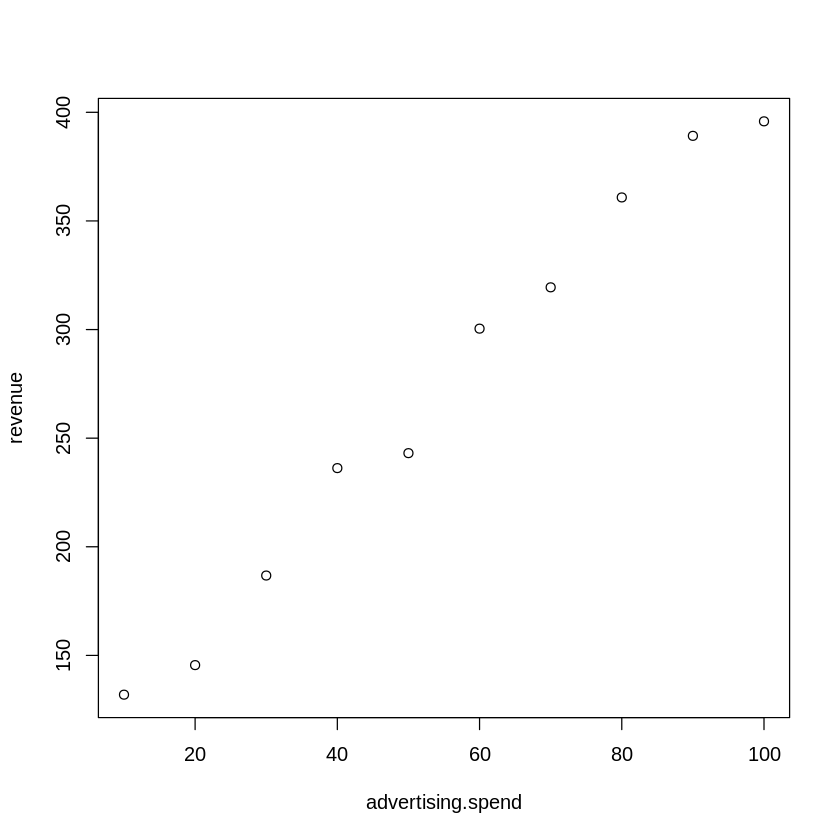

In [1]:
marketing.df <- read.csv("data/marketing.csv")
plot(revenue ~ advertising.spend, data=marketing.df)

This looks like a classic linear relationship, and we can easily fit a line to this data:

In [2]:
model <- lm(revenue ~ advertising.spend, data=marketing.df)

We can graph our model below:

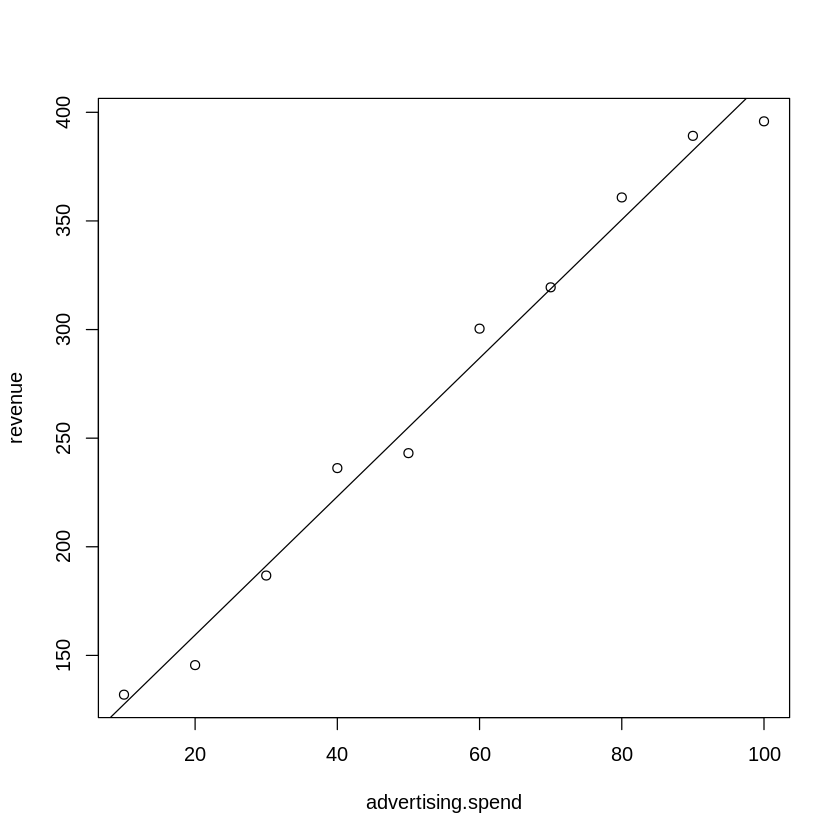

In [3]:
plot(revenue ~ advertising.spend, data=marketing.df)
abline(model)

Our model shows a large positive slope:

In [4]:
summary(model)


Call:
lm(formula = revenue ~ advertising.spend, data = marketing.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.475 -10.035   2.555   9.348  13.562 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        95.6586     8.4350   11.34 3.29e-06 ***
advertising.spend   3.1867     0.1359   23.44 1.17e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.35 on 8 degrees of freedom
Multiple R-squared:  0.9857,	Adjusted R-squared:  0.9839 
F-statistic: 549.5 on 1 and 8 DF,  p-value: 1.166e-08


Should your company increase advertising spending? Potentially. You might envision a future in which your company doubles the advertising budget and extends the happy line above far to the right - let's predict the revenue number for that scenario:

In [5]:
x.max <- tail(marketing.df$advertising.spend, n=1)
x <- 2 * x.max
y <- predict(model, newdata=data.frame("advertising.spend" = x), type="response")

We can now graph this optimistic prediction:

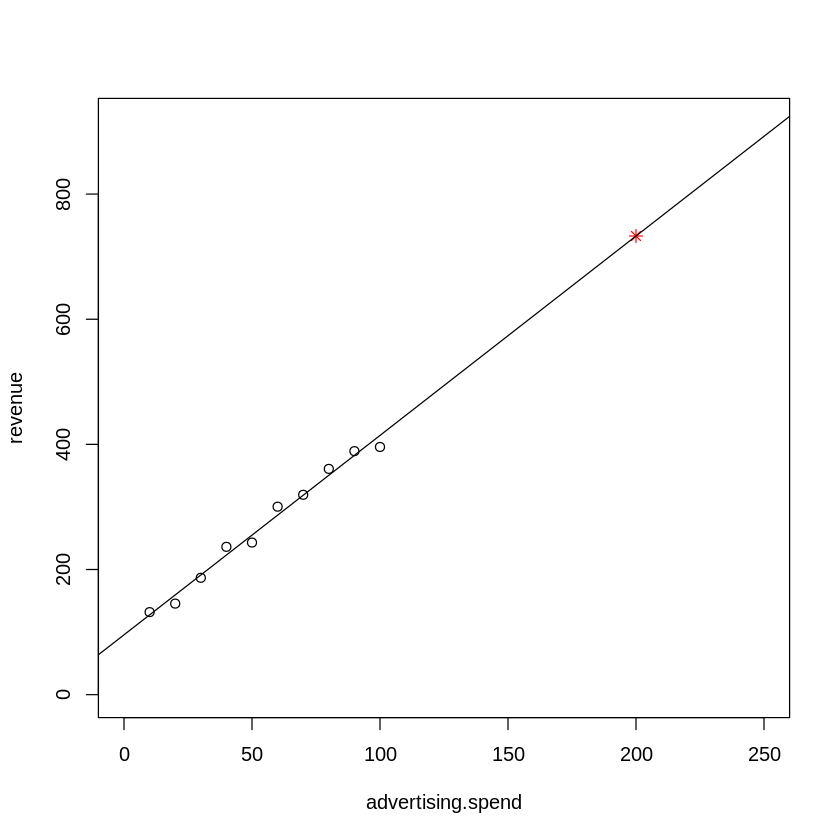

In [6]:
plot(
    revenue ~ advertising.spend,
    data=marketing.df,
    xlim=c(0, 1.25*x),
    ylim=c(0, 1.25*y)
)
points(x,y, col="red", pch=8)
abline(model)

However, blindly extrapolating our line and trusting the resulting prediction could be a serious mistake. It is quite possible that if we gradually increase our advertising to that level, we will instead observe the green points in the graph below:

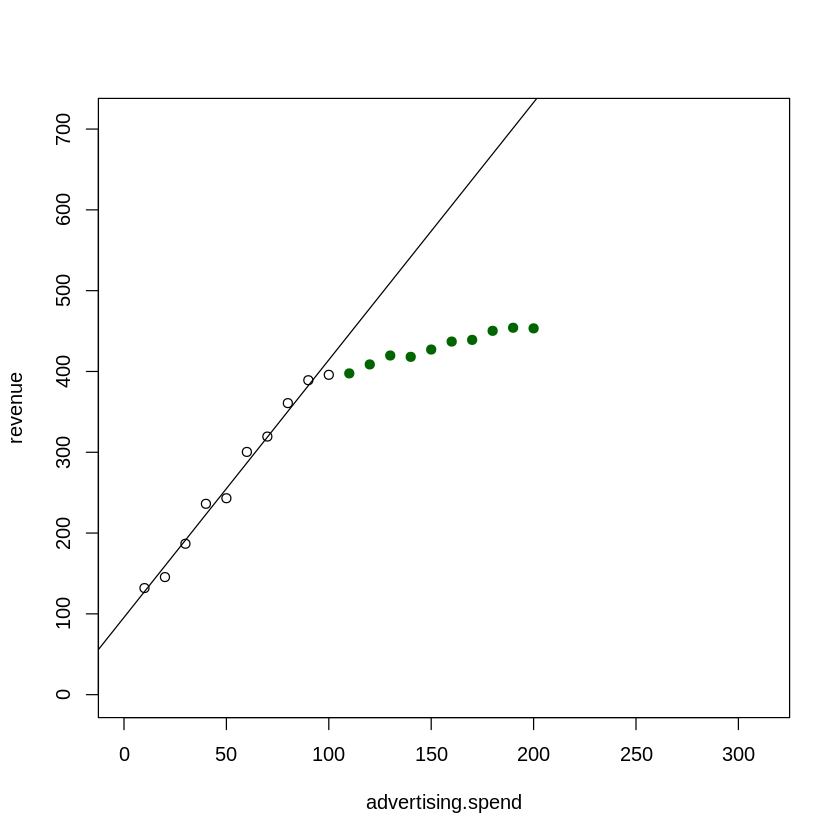

In [7]:
marketing.extended.df <- read.csv("data/marketing-extended.csv")
x.max <- 1.25*max(marketing.extended.df$advertising.spend)
y.max <- 1.25*max(marketing.extended.df$revenue)
plot(
    revenue ~ advertising.spend,
    data=marketing.df,
    xlim=c(0, 1.25*x.max),
    ylim=c(0, 1.25*y.max)
)
points(revenue ~ advertising.spend, data=marketing.extended.df, pch=19, col="darkgreen")
abline(model)

Why might this happen? Perhaps the intial linear trend we observed was due to expanding into a new local market (a new city or town, perhaps) with each increase in our advertising budget. If advertising in each new market converts a relatively constant fraction of the population in that market into customers, then we might expect a roughly linear trend like that which we observed. Now, however, further increasing our advertising budget buys us more advertising in marketing channels that are already partially saturated. Therefore, we observe a smaller revenue increase for each dollar spent and failed to recoup our increase in the advertising budget.

 This phenomenon is known as *diminishing returns*, and occurs in many different contexts in the business world. Just because a line appears to fit our data well over a certain range is no guarantee that the same line will yield accurate predictions when it is extrapolated to data outside of our original range. You must use your domain-specific and business-specific expertise to decide if extrapolating is reasonable in a given situation. 

## The Other Direction: Extrapolating to Zero

Examples like the one above in which a line is fallaciously extrapolated far to the right are perhaps the most commonly occurring type of extrapolation mistakes. However, there is an additional type of subtle extrapolation error that can cause analysts to incorrectly interpret the meaning of their model parameters.

Suppose that we have performed the following regression on the relationship between the size of a store in square meters and the sales of that store:

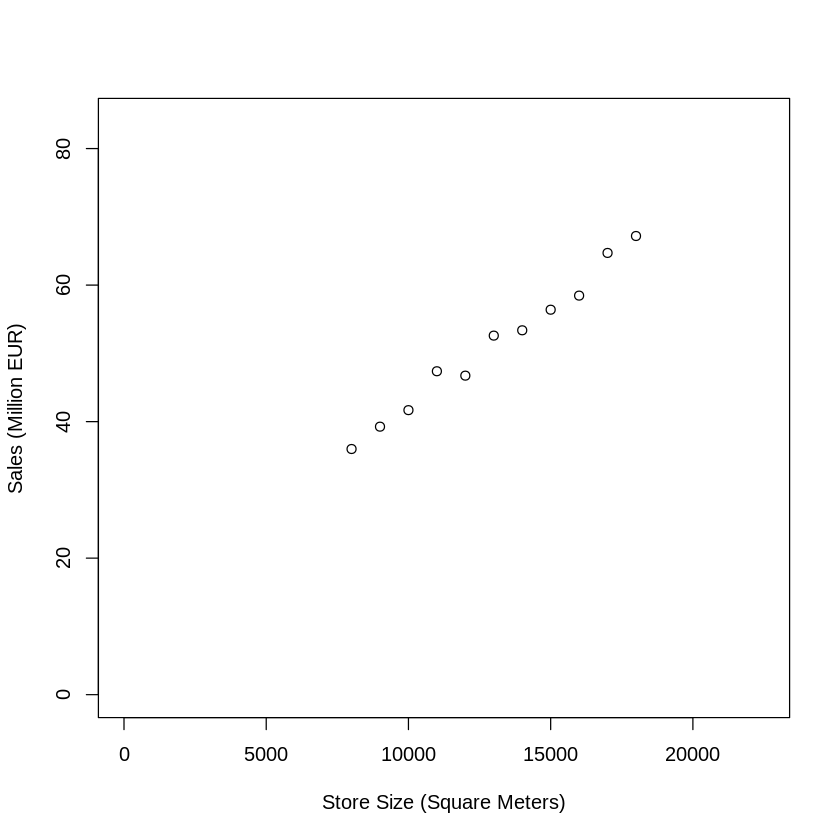

In [8]:
sales.df <- read.csv("data/sales-vs-sq-meters.csv")
plot(sales ~ store.size, 
     data=sales.df, 
     xlim=c(0, 1.25*max(store.size)),
     ylim=c(0, 1.25*max(sales)),
     ylab="Sales (Million EUR)",
     xlab="Store Size (Square Meters)"
)
p <- recordPlot()

Let's fit a line to this data:

In [9]:
model.sales <- lm(sales ~ store.size, data=sales.df)

Graphing this line presents us with an interesting conundrum:

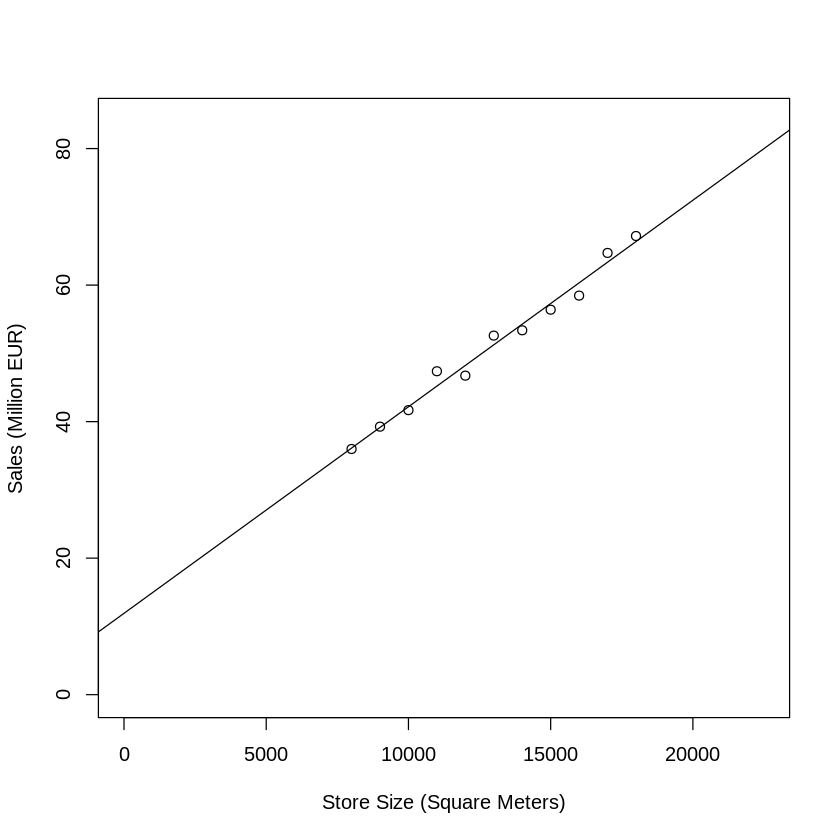

In [10]:
replayPlot(p)
abline(model.sales)

We can see that the *y*-intercept of our line is not zero - in fact, it's precise value given by the `summary` function is far from zero:

In [11]:
summary(model.sales)


Call:
lm(formula = sales ~ store.size, data = sales.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8707 -0.9045 -0.1358  1.0783  2.1772 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.192e+01  1.737e+00   6.862 7.37e-05 ***
store.size  3.026e-03  1.298e-04  23.308 2.34e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.361 on 9 degrees of freedom
Multiple R-squared:  0.9837,	Adjusted R-squared:  0.9819 
F-statistic: 543.3 on 1 and 9 DF,  p-value: 2.345e-09


However, one would imagine that a store with a size of zero square meters cannot be expected to sell ~12 million Euros worth of merchandise, as a naive reading of the above results would suggest. 

Does this mean that our model is wrong? Absolutely not. Our model appears to give a very reasonable fit *over the range of data that we have collected.* Assuming that the *y*-intercept value should correspond to an actual prediction is equivalent to assuming the validity of extrapolating our model all of the way back to zero. As we saw in the section above, such drastic extrapolation is typically unjustified.

However, if desired, we *can* force our regression line to have to go through the origin by adding a `0` to our formula as shown below - this sets the *y*-intercept to zero and changes the slope of the line appropriately to compensate:

In [12]:
model.sales.through.origin <- lm(sales ~ 0 + store.size, data=sales.df)

It is important to understand that *imposing this constraint makes our model's ability to fit the data worse.* The exercise below will illustrate this fact graphically:

<span style="color:blue;font-weight:bold">Exercise</span>: Make a scatter plot `sales ~ store.size` using the `sales.df` data. Then, use the `abline` function to draw `model.sales` as a `blue` line and `model.sales.through.origin` as a `red` line. What do you notice about how well each line fits the data?

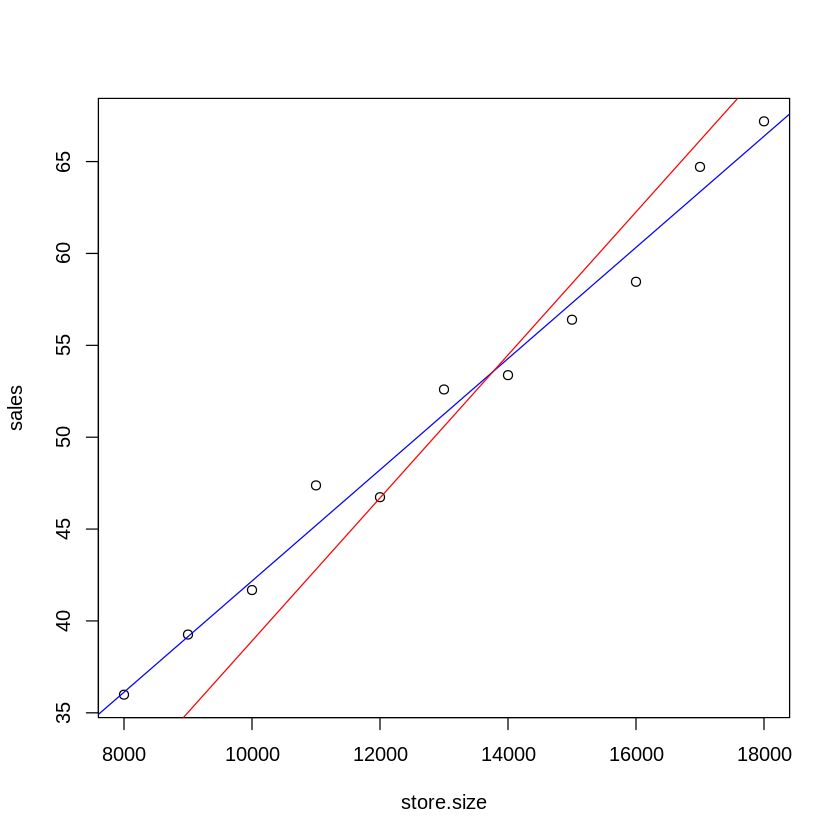

In [19]:
# delete this entire line and replace it with your code

plot(sales ~ store.size, data=sales.df)
abline(model.sales, col='blue')
abline(model.sales.through.origin, col='red')

In [20]:
assert.true(all(get.args.for.call("abline", -2) == c("model.sales", '"blue"')), "Did you draw the line for <code>model.sales</code> using <code>abline</code>?")
assert.true(all(get.args.for.call("abline", -1) == c("model.sales.through.origin", '"red"')), "Did you draw the line for <code>model.sales.through.origin</code> using <code>abline</code>?")
success()

Correct!